In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_bit = pd.read_csv('src/btcusd_1-min_data.csv')

In [3]:
df_bit['date'] = pd.to_datetime(df_bit.Timestamp, unit='s')

In [4]:
df_bit = df_bit.set_index('date')
df_bit = df_bit.drop(columns=['Timestamp'])

In [14]:
df_bit

,Open,High,Low,Close,Volume
date,,,,,
2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.000000
2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.000000
...,...,...,...,...,...
2025-12-08 23:53:00,90601.00,90607.00,90573.00,90583.00,0.335433
2025-12-08 23:54:00,90588.00,90625.00,90588.00,90617.00,0.338469
2025-12-08 23:55:00,90625.00,90642.00,90625.00,90627.00,0.077031


In [5]:
bit_daily = df_bit.resample('1D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

In [6]:
bit_daily

,Open,High,Low,Close,Volume
date,,,,,
2012-01-01,4.58,4.84,4.58,4.84,10.000000
2012-01-02,4.84,5.00,4.84,5.00,10.100000
2012-01-03,5.00,5.32,5.00,5.29,107.085281
2012-01-04,5.29,5.57,4.93,5.57,107.233260
2012-01-05,5.57,6.46,5.57,6.42,70.328742
...,...,...,...,...,...
2025-12-04,93460.00,94086.00,90903.00,92103.00,2700.625289
2025-12-05,92109.00,92690.00,88156.00,89348.00,3068.813660
2025-12-06,89342.00,90286.00,88932.00,89249.00,1058.743730


In [38]:
bit_daily['return_1'] = bit_daily['Close'].pct_change()
bit_daily['log_return_1'] = np.log(bit_daily['Close'] / bit_daily['Close'].shift(1))

for lag in [1, 2, 3, 5]:
    bit_daily[f'cclose_lag_{lag}'] = bit_daily['Close'].shift(lag)
    bit_daily[f'return_lag_{lag}'] = bit_daily['return_1'].shift(lag)

bit_daily['range'] = bit_daily['High'] - bit_daily['Low']
bit_daily['body'] = bit_daily['Close'] - bit_daily['Open']
bit_daily['volatility_10'] = bit_daily['return_1'].rolling(10).std()

bit_daily['sma_5'] = bit_daily['Close'].rolling(5).mean()
bit_daily['sma_20'] = bit_daily['Close'].rolling(20).mean()
bit_daily['sma_ratio_5_20'] = bit_daily['sma_5'] / bit_daily['sma_20']

bit_daily['vol_ma_10'] = bit_daily['Volume'].rolling(10).mean()
bit_daily['vol_rel_10'] = bit_daily['Volume'] / bit_daily['vol_ma_10']

bit_daily['dow'] = bit_daily.index.dayofweek
bit_daily['month'] = bit_daily.index.month

df_bit_model = bit_daily.dropna()

In [39]:
df_bit_model

,Open,High,Low,Close,Volume,return_1,log_return_1,cclose_lag_1,return_lag_1,cclose_lag_2,...,volatility_10,sma_5,sma_20,sma_ratio_5_20,vol_ma_10,vol_rel_10,dow,month,y_return,y_direction
date,,,,,,,,,,,,,,,,,,,,,
2012-01-20,6.01,6.95,6.01,6.95,184.075833,0.156406,0.145317,6.01,-0.153521,7.10,...,0.092710,6.812,6.4410,1.057600,84.391594,2.181211,4,1,0.000000,0
2012-01-21,6.95,6.95,6.95,6.95,0.000000,0.000000,0.000000,6.95,0.156406,6.01,...,0.092550,6.782,6.5465,1.035973,75.058897,0.000000,5,1,-0.017266,0
2012-01-22,6.95,6.95,6.03,6.83,162.034885,-0.017266,-0.017417,6.95,0.000000,6.95,...,0.089367,6.768,6.6380,1.019584,81.369222,1.991354,6,1,-0.045388,0
2012-01-23,6.83,6.83,6.00,6.52,95.570629,-0.045388,-0.046450,6.83,-0.017266,6.95,...,0.088826,6.652,6.6995,0.992910,87.563603,1.091442,0,1,0.004601,1
2012-01-24,6.52,6.57,6.00,6.55,85.446241,0.004601,0.004591,6.52,-0.045388,6.83,...,0.085319,6.760,6.7485,1.001704,93.313895,0.915686,1,1,-0.083969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-03,91303.00,94172.00,91030.00,93472.00,4462.815229,0.023790,0.023511,91300.00,0.058048,86291.00,...,0.028308,90455.400,90219.5500,1.002614,2920.245170,1.528233,2,12,-0.014646,0
2025-12-04,93460.00,94086.00,90903.00,92103.00,2700.625289,-0.014646,-0.014754,93472.00,0.023790,91300.00,...,0.028927,90709.600,90099.2500,1.006774,2781.019317,0.971092,3,12,-0.029912,0
2025-12-05,92109.00,92690.00,88156.00,89348.00,3068.813660,-0.029912,-0.030369,92103.00,-0.014646,93472.00,...,0.030644,90502.800,89789.7000,1.007942,2800.783498,1.095698,4,12,-0.001108,0


In [40]:
features = [col for col in df_bit_model.columns
            if col not in ['Close']]

X = df_bit_model[features].values
y = df_bit_model['Close']

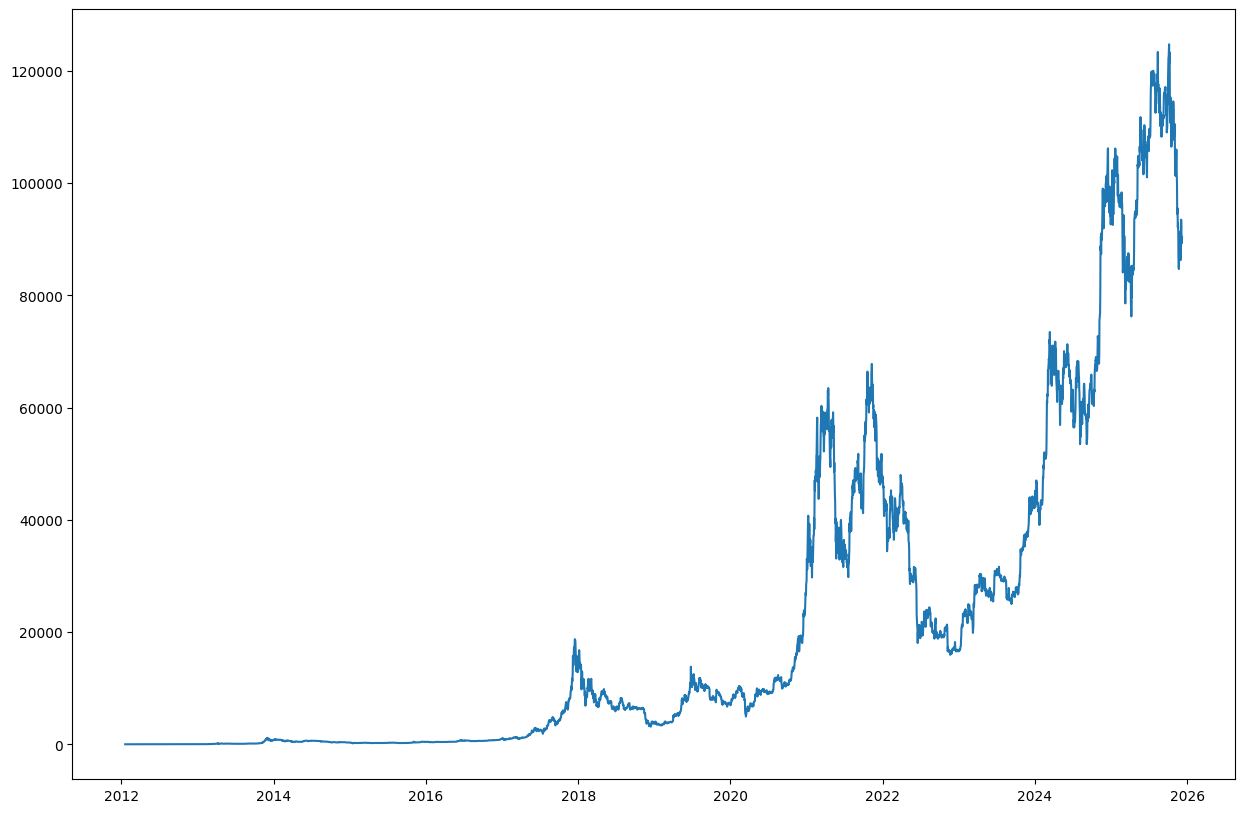

In [41]:
plt.figure(figsize=(15, 10))

plt.plot(df_bit_model.index, y)

In [11]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [42]:
val_days = 100
test_days = 28

X_train = X[:-(val_days + test_days)]
y_train = y[:-(val_days + test_days)]

X_val = X[-val_days:-test_days]
y_val = y[-val_days:-test_days]

X_test = X[-test_days:]
y_test = y[-test_days:]

In [43]:
reg = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    early_stopping_rounds=50, 
    objective='reg:squarederror'
)

In [44]:

reg.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=100
)

[0]	validation_0-rmse:26607.38961	validation_1-rmse:92522.34598


[100]	validation_0-rmse:9864.45648	validation_1-rmse:36537.85080
[200]	validation_0-rmse:3684.95792	validation_1-rmse:15215.18571
[300]	validation_0-rmse:1408.78935	validation_1-rmse:7125.67015
[400]	validation_0-rmse:586.02605	validation_1-rmse:4084.24837
[500]	validation_0-rmse:312.78595	validation_1-rmse:3173.89915
[600]	validation_0-rmse:232.10567	validation_1-rmse:2873.74455
[700]	validation_0-rmse:201.11465	validation_1-rmse:2758.83661
[800]	validation_0-rmse:184.92174	validation_1-rmse:2683.77246
[900]	validation_0-rmse:175.94031	validation_1-rmse:2635.04377
[999]	validation_0-rmse:165.84451	validation_1-rmse:2622.07736


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,None


In [45]:
prediction = reg.predict(X_test)

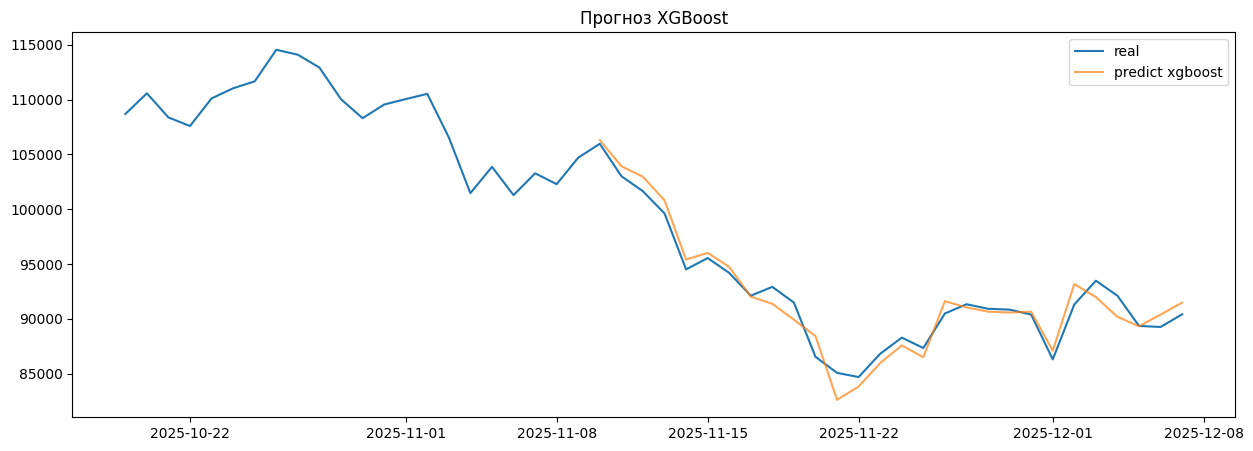

In [46]:
plt.figure(figsize=(15, 5))
plt.plot(df_bit_model.index[-50:], df_bit_model.Close[-50:], label='real')
plt.plot(df_bit_model.index[-28:], prediction, label='predict xgboost', alpha=0.7)
plt.title('Прогноз XGBoost')
plt.legend()

In [47]:
rmse = np.sqrt(mean_squared_error(y_test, prediction))
mape = mean_absolute_percentage_error(y_test, prediction)

print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4%}")

RMSE: 1143.6637
MAPE: 1.0566%


In [49]:
df_diff = df_bit_model.copy()
df_diff['target_diff'] = df_diff['Close'].diff()

df_diff = df_diff.dropna()

X_diff = df_diff[features]
y_diff = df_diff['target_diff']

In [64]:
test_days = 56
val_days = 100

end_date_d = df_diff.index.max()
test_split_date_d = end_date_d - pd.Timedelta(days=test_days)
val_split_date_d = test_split_date_d - pd.Timedelta(days=val_days)

X_train_d = X_diff[X_diff.index < val_split_date_d]
y_train_d = y_diff[y_diff.index < val_split_date_d]

mask_val_d = (X_diff.index >= val_split_date_d) & (X_diff.index < test_split_date_d)
X_val_d = X_diff[mask_val_d]
y_val_d = y_diff[mask_val_d]

X_test_d = X_diff[X_diff.index >= test_split_date_d]
y_test_d = y_diff[y_diff.index >= test_split_date_d]

In [65]:
reg_diff = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    early_stopping_rounds=50,
    objective='reg:squarederror'
)

In [66]:
reg_diff.fit(
    X_train_d, y_train_d,
    eval_set=[(X_train_d, y_train_d), (X_val_d, y_val_d)],
    verbose=100
)

[0]	validation_0-rmse:923.75888	validation_1-rmse:1974.57262


[100]	validation_0-rmse:360.54476	validation_1-rmse:848.00317
[200]	validation_0-rmse:149.86179	validation_1-rmse:496.34171
[300]	validation_0-rmse:70.80821	validation_1-rmse:395.99399
[400]	validation_0-rmse:40.50779	validation_1-rmse:367.84061
[500]	validation_0-rmse:27.70114	validation_1-rmse:342.00076
[600]	validation_0-rmse:22.20992	validation_1-rmse:336.33639
[672]	validation_0-rmse:20.17830	validation_1-rmse:334.66822


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,None


In [67]:
pred_diffs = reg_diff.predict(X_test_d)

prev_close = df_bit_model['Close'].shift(1).loc[y_test_d.index]

last_train_close = df_bit_model.loc[X_train_d.index[-1], 'Close']
prev_close.iloc[0] = last_train_close

pred_prices_reconstructed = prev_close + pred_diffs

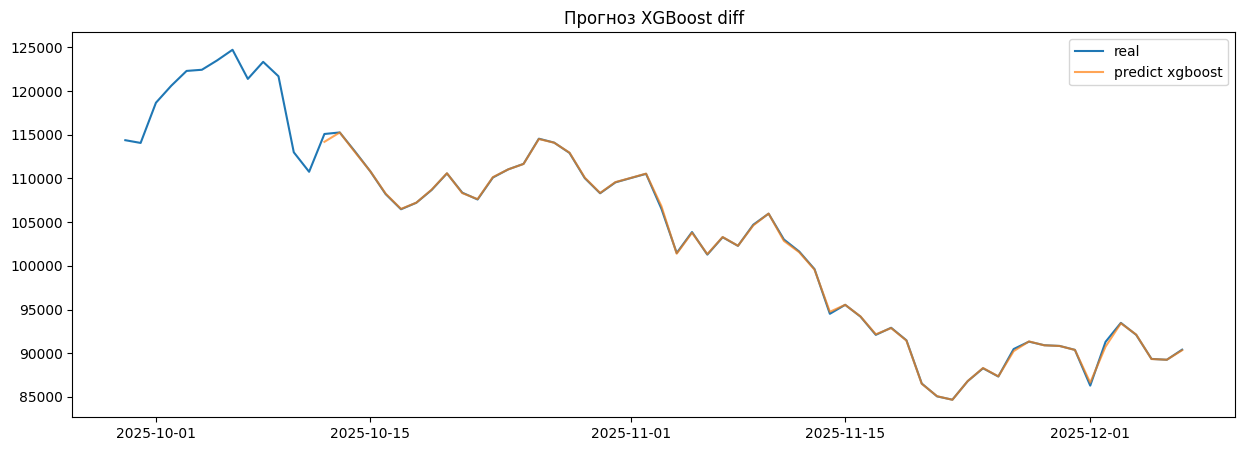

In [69]:
plt.figure(figsize=(15, 5))
plt.plot(df_bit_model.index[-70:], df_bit_model.Close[-70:], label='real')
plt.plot(pred_prices_reconstructed.index, pred_prices_reconstructed, label='predict xgboost', alpha=0.7)
plt.title('Прогноз XGBoost diff')
plt.legend()